In [2]:
%pip install psutil
import psutil
import subprocess
import time
import os

Note: you may need to restart the kernel to use updated packages.


In [ ]:

init_pids = set(psutil.pids())
instance = subprocess.Popen(["python3", "../scripts/forward_bash.py", "../saved_models/pytorch/catdog_20_epoch.pth", "../img/cat.jpg"])

t = 0
step = 0.1
processes = {}

start_time = time.time()

while time.time() - start_time < 10:
    curr_pids = set(psutil.pids())
    new_pids = curr_pids - init_pids
    for pid in new_pids:
        try:
            p = psutil.Process(pid)
            if p.status() == psutil.STATUS_ZOMBIE:
                continue

            snapshot = {
                "rss": p.memory_info().rss,
                "cpu": p.cpu_percent(interval=0.1)/psutil.cpu_count(),
                "status": p.status(),
                "cmd": " ".join(p.cmdline())
            }

            processes.setdefault(pid, {})[t] = snapshot

        except psutil.NoSuchProcess:
            pass

    time.sleep(step)
    t += step


print(processes)

os.system("rm /tmp/backpipe")


Predicted: Cat (100.00%)
{418319: {0: {'rss': 4206592, 'cpu': 5.61875, 'status': 'running', 'cmd': 'python3 ../scripts/forward_bash.py ../saved_models/pytorch/catdog_20_epoch.pth ../img/cat.jpg'}, 0.1: {'rss': 94670848, 'cpu': 32.4625, 'status': 'running', 'cmd': 'python3 ../scripts/forward_bash.py ../saved_models/pytorch/catdog_20_epoch.pth ../img/cat.jpg'}, 0.2: {'rss': 157184000, 'cpu': 23.0875, 'status': 'running', 'cmd': 'python3 ../scripts/forward_bash.py ../saved_models/pytorch/catdog_20_epoch.pth ../img/cat.jpg'}, 0.30000000000000004: {'rss': 172978176, 'cpu': 6.24375, 'status': 'running', 'cmd': 'python3 ../scripts/forward_bash.py ../saved_models/pytorch/catdog_20_epoch.pth ../img/cat.jpg'}, 0.4: {'rss': 192851968, 'cpu': 6.24375, 'status': 'running', 'cmd': 'python3 ../scripts/forward_bash.py ../saved_models/pytorch/catdog_20_epoch.pth ../img/cat.jpg'}, 0.5: {'rss': 200978432, 'cpu': 6.2375, 'status': 'running', 'cmd': 'python3 ../scripts/forward_bash.py ../saved_models/pytor

0

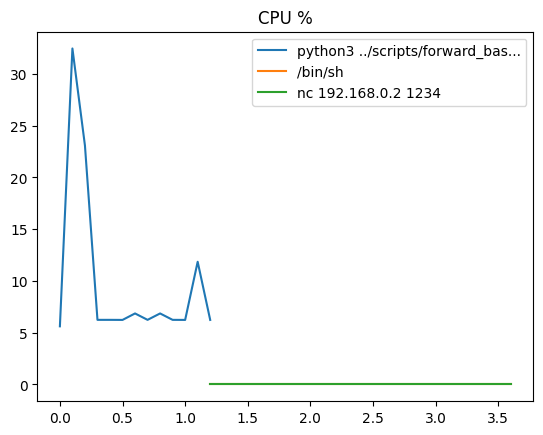

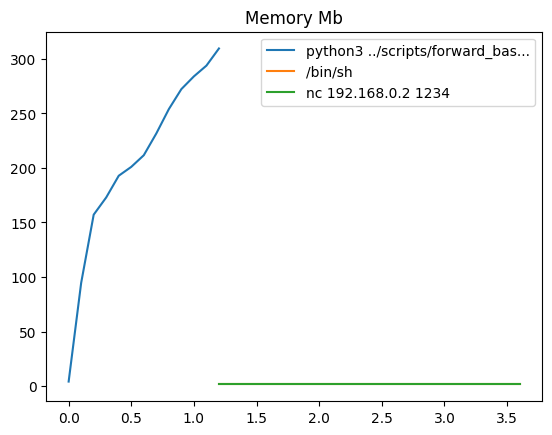

In [ ]:
import matplotlib.pyplot as plt
import json

with open("data.json", "r") as f:
    processes = json.load(f)

plt.figure()

for pid in sorted(processes.keys()):
    times = sorted(processes[pid].keys())
    cpu_values = [processes[pid][t]["cpu"] for t in times]
    cmd = processes[pid][times[0]]["cmd"]
    label = cmd[:30] + '...' if len(cmd) > 30 else cmd
    plt.plot(times, cpu_values, label=label)
plt.legend()
plt.title("CPU %")

plt.figure()

for pid in sorted(processes.keys()):
    times = sorted(processes[pid].keys())
    mem_values = [processes[pid][t]["rss"]/1e6 for t in times]
    cmd = processes[pid][times[0]]["cmd"]
    label = cmd[:30] + '...' if len(cmd) > 30 else cmd
    plt.plot(times, mem_values, label=label)
plt.legend()
plt.title("Memory Mb")

plt.show()